In [16]:
import pandas as pd

sensor_data = "001_b45731a0_raw_sensor_data.csv"
cognitive_phase_data = "001-cognitive-phase.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)

# Check if a categorical value exists in the DataFrame
if df_phases['Cognitive Task'].isin(['Data Exploration']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

# Rename categorical values in a column
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].replace({'Data Exploration': 'Explore'})



The categorical value exists in the DataFrame


In [17]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


     Time Started       Cognitive Task              Screens
0        162000.0              Explore                  Map
1        167000.0              Explore  Supporting material
2        180000.0              Explore                  Map
3        185000.0  Generate Hypothesis  Supporting material
4        221000.0  Generate Hypothesis  Supporting material
..            ...                  ...                  ...
165     2545000.0       Assess Results                  Map
166     2551000.0      Test Hypothesis               Filter
167     2557000.0       Assess Results                  Map
168     2564000.0       Assess Results           Statistics
169     2602000.0             Conclude  Supporting material

[170 rows x 3 columns]
float64


In [18]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36236.0,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,0.0,0.030948,0.004428,NaN,NaN
1,36254.9,0.125566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36269.0,0.125566,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,0.0,0.051102,0.007234,NaN,NaN
3,36284.9,0.125566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36301.0,0.125566,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,0.0,0.043316,0.012638,NaN,NaN


In [19]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])
final_df.to_csv('001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv', index=False)
final_df.tail()

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
158537,2699946.0,3.681722,0.140199,0.024844,4.939115,0.038651,0.110343,2.680707,0.328766,0.0,0.038054,0.009343,Conclude,Supporting material
158538,2699979.0,3.479876,0.137436,0.024335,4.663588,0.039819,0.109299,2.567321,0.328766,0.0,0.027288,0.009260,Conclude,Supporting material
158539,2700009.0,3.171252,0.139108,0.024456,4.206734,0.039129,0.109841,2.291128,0.328766,0.0,0.025101,0.010269,Conclude,Supporting material
158540,2700041.0,3.140329,0.137927,0.024342,4.166446,0.039638,0.109387,2.280451,0.328766,0.0,0.023803,0.012145,Conclude,Supporting material
158541,2700073.0,3.286117,0.138426,0.024482,4.377196,0.039399,0.109571,2.393333,0.328766,0.0,0.025101,0.014538,Conclude,Supporting material


In [20]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
115887,1982729.0,0.215787,0.151603,0.057459,0.194043,0.035758,0.115209,0.056229,0.554087,0.000000,0.720518,0.068039,Set Goal,Statistics
138008,2355578.0,0.635962,0.189298,0.134117,0.549195,0.024851,0.125332,0.096617,2.577483,0.000000,0.073984,0.073844,Assess Results,Statistics
110419,1891069.0,0.946992,0.077300,0.023826,6.266303,0.026974,0.071984,4.275181,5.406803,0.000000,0.981393,0.410661,Assess Results,Map
42911,758990.0,0.075188,0.016675,0.026051,9.973360,0.024148,0.025193,9.818626,63.860710,0.000000,0.009003,0.037372,Assess Results,Map
50928,892780.0,0.673928,0.066212,0.258294,0.523521,0.134289,0.080940,0.072118,37.256283,9.741444,0.014924,0.318081,Test Hypothesis,Filter
42674,754987.0,2.497097,0.191490,0.047116,2.954089,0.024169,0.127049,0.990571,0.337580,0.000000,0.026545,0.026545,Assess Results,Map
117509,2009720.0,2.844987,0.179837,0.025956,4.223628,0.024322,0.122953,2.242532,0.328766,0.000000,0.116236,0.023763,Generate Hypothesis,Statistics
30354,547642.0,0.201694,0.185113,0.024025,0.210962,0.025244,0.124768,0.095207,0.328766,0.000000,0.103461,0.103461,Focus,Statistics
119009,2034759.0,1.430448,0.192579,0.679974,1.038770,0.024128,0.126482,0.083724,62.710987,0.000000,0.001677,0.020687,Generate Hypothesis,Statistics
56791,990441.0,0.390742,0.000107,0.144629,0.032751,99.979050,0.012160,0.066935,99.981049,96.800682,0.016405,0.016405,Assess Results,Filter


In [21]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,7.934500e+04,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000,79345.000000
mean,1.369204e+06,0.927729,0.236420,0.376627,1.479852,5.937353,0.285892,0.686932,22.137284,7.244925,1.306198,0.467868
std,7.685357e+05,2.913113,2.155168,3.247520,5.349511,22.369736,2.558369,4.342761,33.044594,23.321146,5.764883,3.648233
min,3.623600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-67.881241,0.000000,0.000000
25%,7.040750e+05,0.125566,0.151043,0.024630,0.138986,0.024360,0.115063,0.059034,0.328766,0.000000,0.034176,0.017582
50%,1.369136e+06,0.176686,0.187501,0.031779,0.235411,0.025323,0.125685,0.076229,0.643951,0.000000,0.109278,0.045959
75%,2.034843e+06,0.605015,0.192106,0.123546,0.839612,0.033621,0.127124,0.216277,46.902702,0.000000,0.501356,0.122091
max,2.700073e+06,94.093216,97.368004,93.648643,95.832893,99.979645,81.516922,99.069252,99.981064,99.933968,99.140770,96.389641


In [22]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0       Assess Results  0.204470  0.190210  0.028584  0.213075  0.024695   
1             Conclude  0.271076  0.188697  0.040446  0.240705  0.024864   
2              Explore  0.125566  0.170625  0.023144  0.131497  0.029263   
3                Focus  0.157351  0.181435  0.031294  0.174504  0.027061   
4  Generate Hypothesis  0.125566  0.171775  0.047884  0.332030  0.029640   
5             Set Goal  0.190679  0.184415  0.045607  0.316537  0.026012   
6      Test Hypothesis  0.237402  0.185941  0.030531  0.215016  0.025639   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.126405  0.073854    0.328766        0.106886   0.048119  
1  0.125942  0.072432    0.623257        0.071212   0.038781  
2  0.120726  0.059707    0.328766        0.221535   0.012519  
3  0.125110  0.068558    1.282392        0.207931   0.047917  
4  0.119789  0.093780    7.327151        0.111057   0.051561  
5  0.124909  

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Assess Results,0.204470,0.190210,0.028584,0.213075,0.024695,0.126405,0.073854,0.328766,0.106886,0.048119
1,Conclude,0.271076,0.188697,0.040446,0.240705,0.024864,0.125942,0.072432,0.623257,0.071212,0.038781
2,Explore,0.125566,0.170625,0.023144,0.131497,0.029263,0.120726,0.059707,0.328766,0.221535,0.012519
3,Focus,0.157351,0.181435,0.031294,0.174504,0.027061,0.125110,0.068558,1.282392,0.207931,0.047917
4,Generate Hypothesis,0.125566,0.171775,0.047884,0.332030,0.029640,0.119789,0.093780,7.327151,0.111057,0.051561


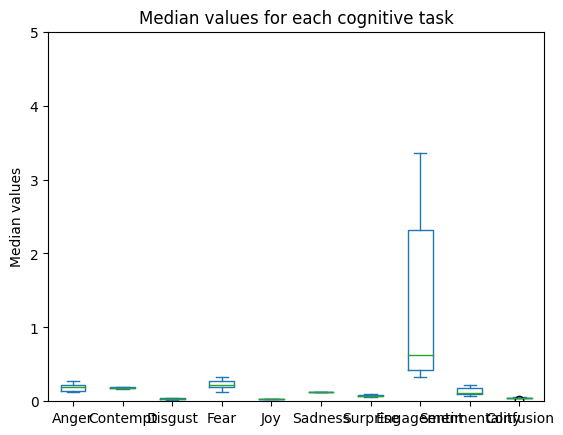

In [23]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [24]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


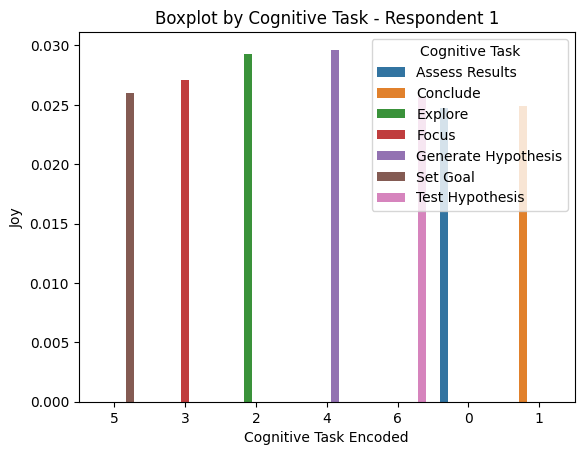

In [26]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Joy', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 1")

# Display the plot
plt.show()


In [27]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger             0.176686
Contempt          0.187501
Disgust           0.031779
Fear              0.235411
Joy               0.025323
Sadness           0.125685
Surprise          0.076229
Engagement        0.643951
Sentimentality    0.109278
Confusion         0.045959
dtype: float64

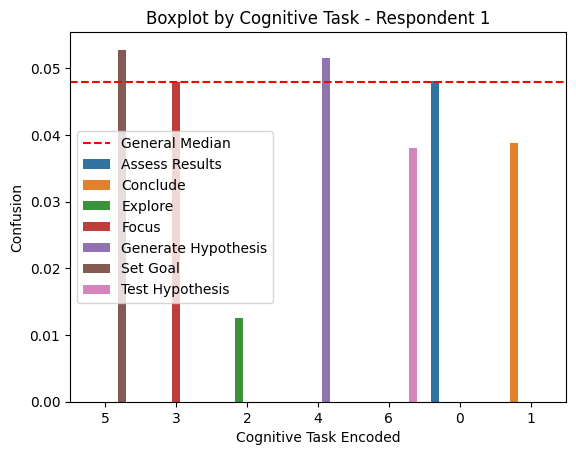

In [29]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 1")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Add legend
plt.legend()

# Display the plot
plt.show()
